In [23]:
%load_ext autoreload
%autoreload 2
import sys
import matplotlib.pyplot as plt
import numpy as np
import cv2

sys.path.append("..")
from cv.locator import DroneLocator, ButtonFinder
from cv.dewarp import dewarp
import os

recal_paths="../../../../Downloads/recalibrating"
recal_imgs=(
    [
        os.path.join(recal_paths, name) 
        for name in os.listdir(recal_paths)
    ]

)

imgs_path = "../imgs/m4/"
landing_preds_path = os.path.join(imgs_path, "landing_det")
landing_pad_imgs = (
    [
        os.path.join(landing_preds_path, name) 
        for name in os.listdir(landing_preds_path)
    ]
)

gantry_preds_path = os.path.join(imgs_path, "end_offsets")
gantry_imgs = (
    [
        os.path.join(gantry_preds_path, name) 
        for name in os.listdir(gantry_preds_path)
    ]
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Adjusting Hyperparameters for button color filter in HSV space

In [18]:
from PIL import Image
locator = DroneLocator(
    linreg_path= "../cv/offset_model.pkl",
    show_circles=True,
    rough_radius_range= (20, 60),
    fine_radius_range= (30, 60),
    qr2but_range=(250, 300), 
    button_color_hsv_low = (25, 50, 100),
    button_color_hsv_high = (40, 255, 255),
)

# for i in gantry_imgs:
#     print(os.path.basename(i))
#     img = locator.imread(i)
#     plt.figure(figsize=(10,10))
#     plt.imshow(locator.color_filt(img), cmap="gray")
#     plt.show()

# Testing performance of locator 

-30 0 0


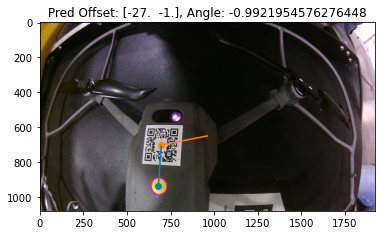

0 10 0


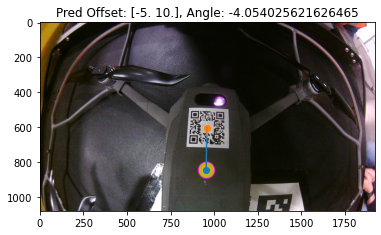

30 0 0


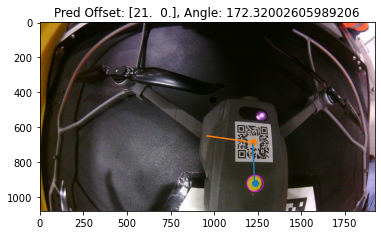

0 0 -10


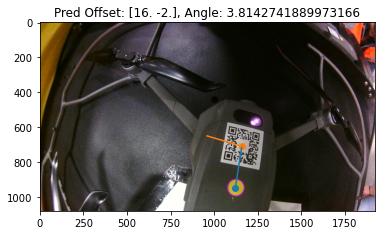

0 30 0
10 20 30
0 0 30
-30 20 -10


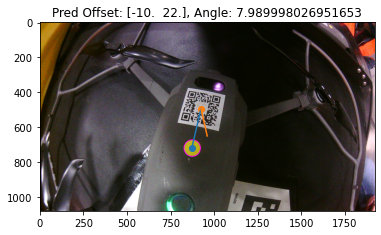

10 0 0


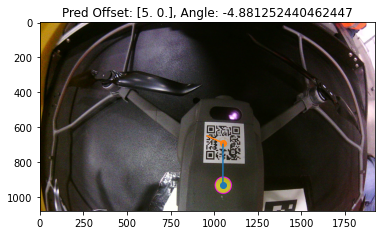

-10 0 0


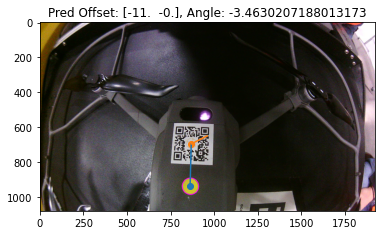

10 10 0


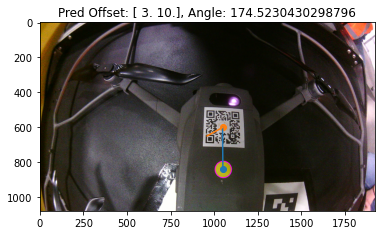

-30 -30 0


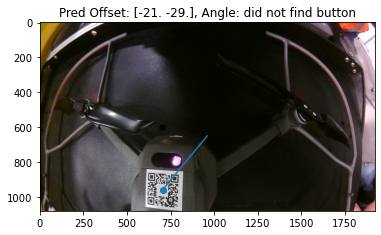

0 -10 0


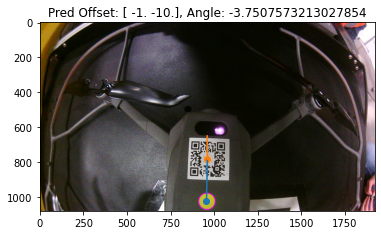

0 0 -30
0 0 10


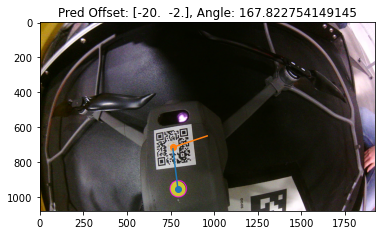

0 -30 0


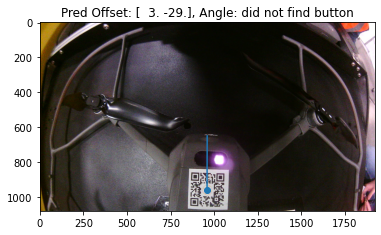

0 0 0


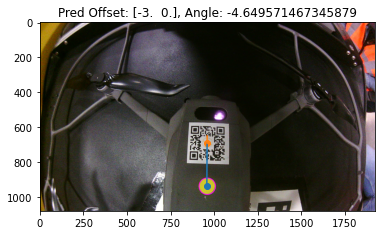

In [67]:
from sklearn.linear_model import LinearRegression

locator = DroneLocator(
    linreg_path= "../cv/offset_model.pkl",
    canny_thresholds=(100, 10),
    show_circles=False,
    rough_radius_range= (30, 50),
    fine_radius_range= (30, 60),
    qr2but_range=(150, 600), 
    button_color_hsv_low = (25, 50, 100),
    button_color_hsv_high = (40, 255, 255),
)

x, y = [],[] 
for i in recal_imgs:
    dx, dy, theta = os.path.basename(i).split(".jpg")[0].split("_")
    dx, dy, theta = int(dx), int(dy), int(theta)
    print(dx, dy, theta)
#     print(os.path.basename(i))
    img = locator.imread(i)
#     plt.figure(figsize=(10,10))
    results = locator(img, True)
#     print(results)
#     if results[0]:
#         x.append((results[1], results[2]))
#         y.append((dx, dy))
        

In [62]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression().fit(x, y)
print(linreg.score(x,y))
import pickle

pickle.dump(linreg, open("../cv/offset_model.pkl", "wb"))

0.7790977963142846


/opt/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/base.py:420: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [20]:
with_drone=set([
    3, 5, 7, 8, 12, 13, 18, 19, 20, 21, 22, 23, 25, 27, 28, 33, 35, 36, 37, 41, 42, 44, 45, 46, 50, 51,52, 53, 
])
len(with_drone)

28

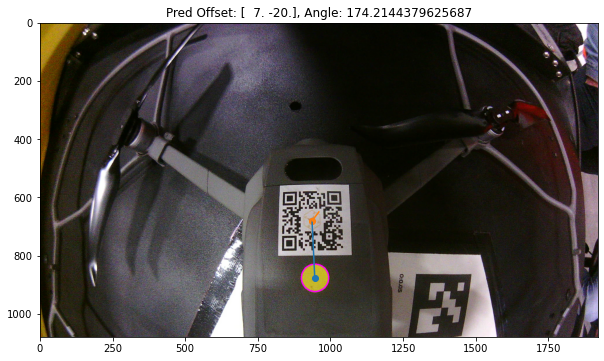

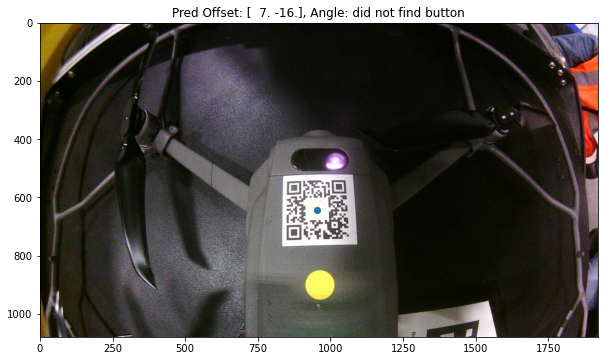

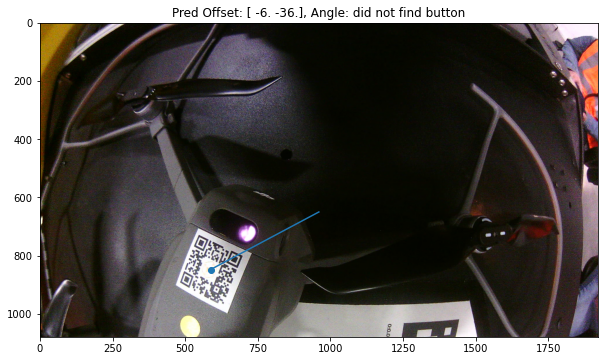

(False, 0, 0, 0)

<Figure size 720x720 with 0 Axes>

In [22]:
img = locator.imread("../../../../Downloads/2020-12-08_170615.jpg")
i1 = "../../../../Downloads/2020-12-08_170615.jpg"
i2 = "../../../../Downloads/2020-12-08_183824.jpg"
i3 = "../../../../Downloads/2020-12-08_185607.jpg"
i4 = "../../../../Downloads/2020-12-08_185615.jpg"
img = locator.imread(i1)
locator.show_circles = True
plt.figure(figsize=(10,10))
locator(img, True)
img = locator.imread(i2)
locator.show_circles = True
plt.figure(figsize=(10,10))
locator(img, True)
img = locator.imread(i3)
locator.show_circles = True
plt.figure(figsize=(10,10))
locator(img, True)
img = locator.imread(i4)
locator.show_circles = True
plt.figure(figsize=(10,10))
locator(img, True)
# butFinder.find(img)

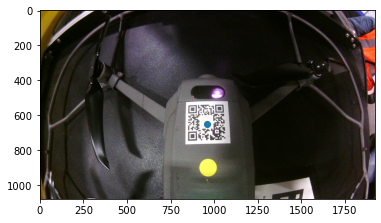

In [15]:

plt.imshow(plt.imread("../../../../Downloads/2020-12-08_183824.jpg"))
plt.scatter(x=960, y = 650)

In [17]:
!ls ../../../../Downloads

000015.png
1212K Exams_F2017.pdf
123c58867f114b39932f68e4c1137c89.jpeg
2020-12-08_170615.jpg
2020-12-08_183824.jpg
2020-12-08_185607.jpg
2020-12-08_185615.jpg
20200901_software_development_process.pptx
20201018_132730.gpx
20201021_202306.gpx
4_5926794709425981298.pdf
76725561b53640f2a415585c94ac9c77.jpeg
Abbreviated Report Acids and Bases (1212K) 202008 (1).pdf
Abbreviated Report Kinetics (1212K) 202008 (1).pdf
Abbreviated Report Measurement of K (1212K) 202008.pdf
Anaconda3-2020.07-MacOSX-x86_64.sh
BetterTouchTool.app
BetterTouchTool.zip
Blitz-1.13.47.dmg
CHEM 1212k 201902 Exam 3 Form A KEY.pdf
CHEM 1212k 201902 Exam 3 Form A.pdf
CS4510 Exam 3.pdf
CS4510 Exam.pdf
CSHomework1_firstsubmit.pdf
ColorFilter Testing
CoordinationChem_handout.pdf
DisplayLink Manager App 1.1.pkg
DropboxInstaller (1).dmg
DropboxInstaller.dmg
File from iOS (1).MOV
File from iOS (2).mov
File from iOS.MOV
Firefox 79.0.dmg
Firefox 81.0.1.dmg
Hack The Box __ Can you hack this box_.pdf
Hextronics-p-transform
Hextroni